In [1]:
import csv

In [2]:
from sklearn import svm, metrics
from numpy import genfromtxt
import numpy as np

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
import sys

In [4]:
warnings.filterwarnings('ignore')
DeprecationWarning('ignore')
os.chdir('C:\\Users\\mohta\\Downloads')

In [5]:
df = pd.read_csv('mnist_train.csv')

In [6]:
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x = df.drop(['label'], axis = 1).values
y = df['label'].values

In [8]:
digit = x[64]
digit


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 100, 237, 121,   0,
         0,   0,   0,   0,   0,  13,  48,  18,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 132, 23

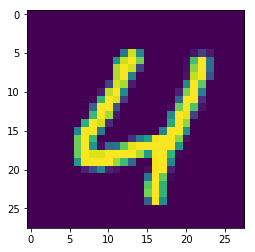

In [9]:
somedigit = digit.reshape(28,28)
plt.imshow(somedigit)

In [10]:
def splitxy(df):
        x=df.drop(['label'], axis=1)
        y=df['label']
        return x, y

In [11]:
classifier = svm.LinearSVC()
train,test= train_test_split(df, test_size=0.2, random_state=2)
x_train, y_train=splitxy(train)
x_test, y_test=splitxy(test)

In [12]:
classifier.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
predicted = classifier.predict(x_test)

In [14]:
 metrics.confusion_matrix(y_test, predicted)

array([[1144,    0,    5,    2,    1,    1,   15,    1,    7,    7],
       [   1, 1301,    5,    7,    6,    1,    4,    3,   15,   11],
       [  30,   29,  983,   16,   12,    1,   40,   24,   47,   12],
       [  17,    5,   37, 1067,    6,   16,    7,   22,   29,   46],
       [   6,    2,    9,    2, 1085,    0,   11,    7,    1,   94],
       [  44,    7,   15,  129,   37,  647,   41,   13,   49,  101],
       [  16,    5,    6,    2,   18,    5, 1114,    0,    3,    0],
       [   4,    3,   10,    0,   22,    0,    0, 1114,    2,   65],
       [  28,   33,   16,   40,   16,   17,   12,   15,  836,  153],
       [   9,    1,    2,   13,   32,    1,    0,   30,    6, 1068]],
      dtype=int64)

In [15]:
score=accuracy_score(y_test,predicted)
print(score)

0.86325


In [21]:
from sklearn.ensemble import RandomForestRegressor
ran_model=RandomForestClassifier()
ran_model.fit(x_train,y_train)
ran_prediction=ran_model.predict(x_test)
ran_score=accuracy_score(y_test,ran_prediction)
print(ran_score)

0.9444166666666667


In [22]:
dec_model=DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
dec_prediction=dec_model.predict(x_test)
dec_score=accuracy_score(y_test,dec_prediction)
print(dec_score)

0.8691666666666666


In [20]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train,y_train)
gnb_prediction=gnb.predict(x_test)
gnb_score=accuracy_score(y_test,gnb_prediction)
print(gnb_score)

0.5549166666666666
